# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [76]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [77]:
# Your code here
df = pd.read_csv('data/ames.csv', index_col = 0)

The following code checks that you loaded the data correctly:

In [78]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [79]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [80]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

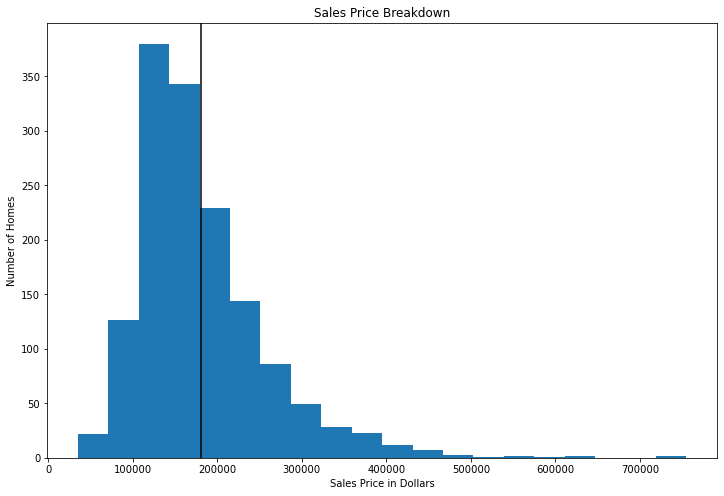

In [81]:
# Your code here

saleprice_data = df['SalePrice'] 

fig, ax = plt.subplots(figsize=(12,8)) 
ax.hist(saleprice_data, bins = 20) 
ax.set_xlabel('Sales Price in Dollars')
ax.set_ylabel('Number of Homes')
ax.set_title('Sales Price Breakdown')
ax.axvline(x = saleprice_data.mean(), c ='black');


Now, print out the mean, median, and standard deviation:

In [82]:
print('The Mean of the SalePrice dataset is',saleprice_data.mean())
print('The Median of the SalePrice dataset is', saleprice_data.median())
print('The Standard Deviation of the SalePrice dataset is', saleprice_data.std())
    


The Mean of the SalePrice dataset is 180921.19589041095
The Median of the SalePrice dataset is 163000.0
The Standard Deviation of the SalePrice dataset is 79442.50288288662


In the cell below, interpret the above information.

In [83]:
# Replace None with appropriate text
"""
For the 1460 records in this database, the average sales price was
$180,921, the median price was 163,000 and the std was 79,442.

Looking at the plot you can see the majority of the values
hover around the median value creating a shape close to bell curve.
This plot also shows that there are 
a few outliers on the high end of the sales price dataset that 
are pulling the average away from the median number. 
"""

'\nFor the 1460 records in this database, the average sales price was\n$180,921, the median price was 163,000 and the std was 79,442.\n\nLooking at the plot you can see the majority of the values\nhover around the median value creating a shape close to bell curve.\nThis plot also shows that there are \na few outliers on the high end of the sales price dataset that \nare pulling the average away from the median number. \n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

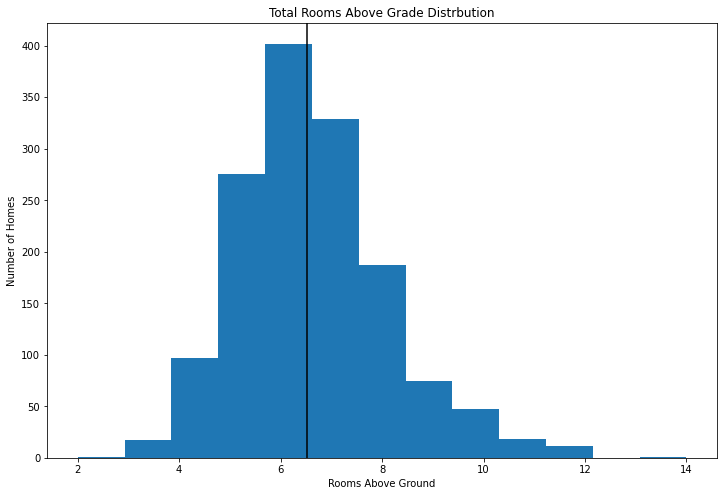

In [84]:
def produce_histogram(df, column, bins, xlabel, title):
    import math
    column_data = df[column] #picks the correct column for data
    fig, ax = plt.subplots(figsize=(12,8)) # creates plot
    ax.hist(column_data, bins = bins) #plots data as histogram
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Number of Homes')
    ax.set_title(title)
    ax.axvline(x = column_data.mean(), c ='black') #makes black line at mean

produce_histogram(df, 'TotRmsAbvGrd', 13, 'Rooms Above Ground', 'Total Rooms Above Grade Distrbution')

Now, print out the mean, median, and standard deviation:

In [85]:
def get_mean_median_std(df,column):
    column_data = df[column]
    print('The Mean of the', column, 'dataset is',column_data.mean())
    print('The Median of the', column, 'dataset is', column_data.median())
    print('The Standard Deviation of the', column, 'dataset is', column_data.std())
    
get_mean_median_std(df, 'TotRmsAbvGrd')

The Mean of the TotRmsAbvGrd dataset is 6.517808219178082
The Median of the TotRmsAbvGrd dataset is 6.0
The Standard Deviation of the TotRmsAbvGrd dataset is 1.6253932905840505


In the cell below, interpret the above information.

In [86]:
# Replace None with appropriate text
"""
This is almost a normal distribution as the median and mean are
almost equal. Again there are a few outliets on the high end
pull the mean away from the median but this has a much smaller relative
effect when compared with the sales price distribution.
It is also good to note there is not a large range across the
values as the std is only 1.6
"""

'\nThis is almost a normal distribution as the median and mean are\nalmost equal. Again there are a few outliets on the high end\npull the mean away from the median but this has a much smaller relative\neffect when compared with the sales price distribution.\nIt is also good to note there is not a large range across the\nvalues as the std is only 1.6\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

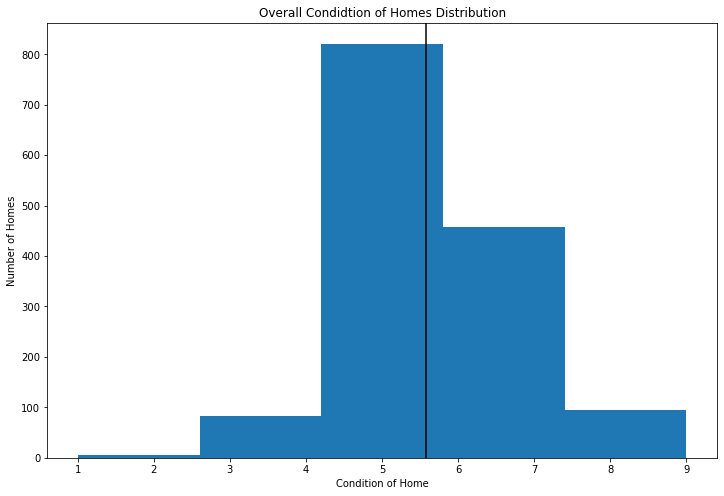

In [98]:
produce_histogram(df, 'OverallCond', 5, 'Condition of Home', 'Overall Condidtion of Homes Distribution')


Now, print out the mean, median, and standard deviation:

In [95]:
# Your code here
get_mean_median_std(df,'OverallCond')

The Mean of the OverallCond dataset is 5.575342465753424
The Median of the OverallCond dataset is 5.0
The Standard Deviation of the OverallCond dataset is 1.1127993367127316


In the cell below, interpret the above information.

In [100]:
# Replace None with appropriate text
"""
A Majority of the homes in this data set are rated around an average
condition which corresponds to the number "5" on the graph above.
Again the mean and median are fairly close values which, along with
the overall shape of the graph lead to the conclusion that this is 
close to a normal distribution. 

I had tried to line the bins up so they corresponded with one integer
value each but wasn't able to get the perfect setup

"""

'\nA Majority of the homes in this data set are rated around an average\ncondition which corresponds to the number "5" on the graph above.\nAgain the mean and median are fairly close values which, along with\nthe overall shape of the graph lead to the conclusion that this is \nclose to a normal distribution. \n\nI had tried to line the bins up so they corresponded with one integer\nvalue each but wasn\'t able to get the perfect setup\n\n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [113]:
# Replace None with appropriate code
below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]

below_average_condition

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
70,50,RL,81.0,15593,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,225000
89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
92,20,RL,85.0,8500,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,12,2006,WD,Abnorml,98600
105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,30,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,108500
1363,50,RL,NaN,12513,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,104900
1381,30,RL,45.0,8212,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,58500


The following code checks that you created the subsets correctly:

In [114]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

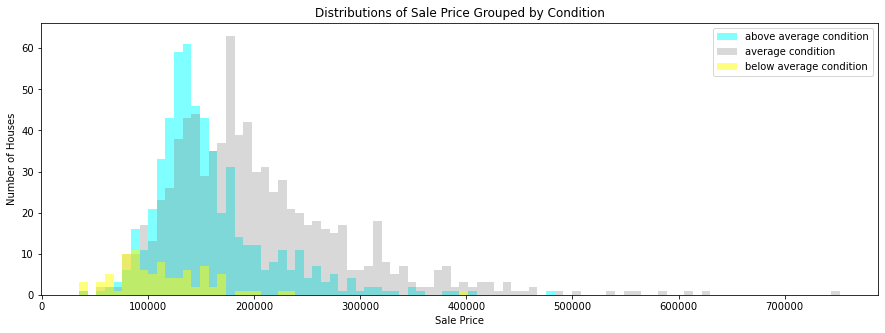

In [115]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [117]:
# Replace None with appropriate text
"""
The plot above shows us that the overall condition of a home is 
not a good indicator of the overall sale price of a below average
home, but not a very strong indicator for average or above average home.

This can be deduced due to the fact that the majority of below 
average homes are all clustered together while there is a much larger
range of sales prices for the other two categories. The peaks 
are differentiated which shows that there are 
different trends between the three graphs but overall this distrubution
is fairly clustered relative to the entire range of prices seen.

Comparing the three subsets it becomes obvious that there are many more
homes of average condition on this list and very few below average,
relative to the entire grouping.

Oddly according to this dataset above average condition homes do not 
tend to sell better than average condition homes.
"""

'\nThe plot above shows us that the overall condition of a home is \nnot a good indicator of the overall sale price of a below average\nhome, but not a very strong indicator for average or above average home.\n\nThis can be deduced due to the fact that the majority of below \naverage homes are all clustered together while there is a much larger\nrange of sales prices for the other two categories. The peaks \nare differentiated which shows that there are \ndifferent trends between the three graphs but overall this distrubution\nis fairly clustered relative to the entire range of prices seen.\n\nComparing the three subsets it becomes obvious that there are many more\nhomes of average condition on this list and very few below average,\nrelative to the entire grouping.\n\nOddly according to this dataset above average condition homes do not \ntend to sell better than average condition homes.\n'

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [166]:
df.corrwith( df['SalePrice'], method ='pearson')


MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
dtype: float64

In [184]:
pearson_list = df.corrwith( df['SalePrice'], method ='pearson') # finds pearson correlations accross all columns

no_sp_pearson_list = pearson_list.drop('SalePrice')


max_index = no_sp_pearson_list.argmax() #finding index of max value

print('The column with the highest postive correlation to Sales Price was',no_sp_pearson_list.index[max_index])
print('And it had a pearson correlation value of',no_sp_pearson_list.max())




The column with the highest postive correlation to Sales Price was OverallQual
And it had a pearson correlation value of 0.7909816005838053


Now, find the ***most negatively correlated*** column:

In [185]:
min_index = no_sp_pearson_list.argmin() #finding min index 

print('The column with the highest postive correlation to Sales Price was',no_sp_pearson_list.index[min_index])
print('And it had a pearson correlation value of',no_sp_pearson_list.min())




The column with the highest postive correlation to Sales Price was KitchenAbvGr
And it had a pearson correlation value of -0.13590737084214113


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

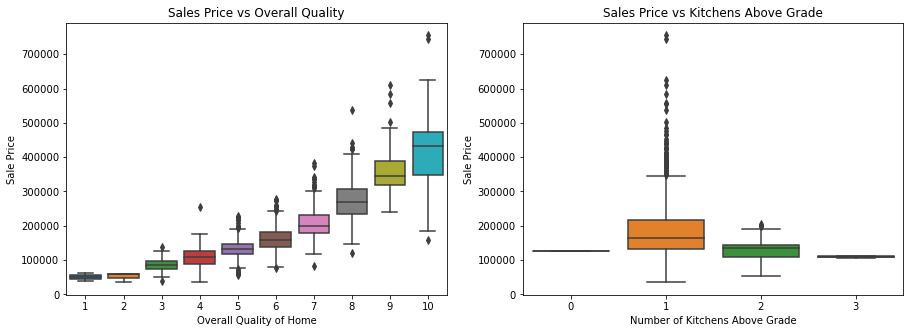

In [187]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df['OverallQual'],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df['KitchenAbvGr'],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title("Sales Price vs Overall Quality")
ax1.set_xlabel('Overall Quality of Home')
ax1.set_ylabel("Sale Price")
ax2.set_title('Sales Price vs Kitchens Above Grade')
ax2.set_xlabel('Number of Kitchens Above Grade')
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [ ]:
# Replace None with appropriate text
"""
The charts visually align with what should be expected based on the 
pearson correlation values. The Overall Quality which had a pearsons
of .791 shows a strong positive corrlation as the quaility of the
home goes up in rank so does the sales price tend to. While this trend
does not look wholey linear, it is fairly close.

The Kitchens above grade chart does not show a strong correlation as
the majority of the homes have only 1 Kitchen above grade. It is also
important to not that even as the number of kitchens increases,it
does not visually increase the sales price on the graph.
"""

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [188]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

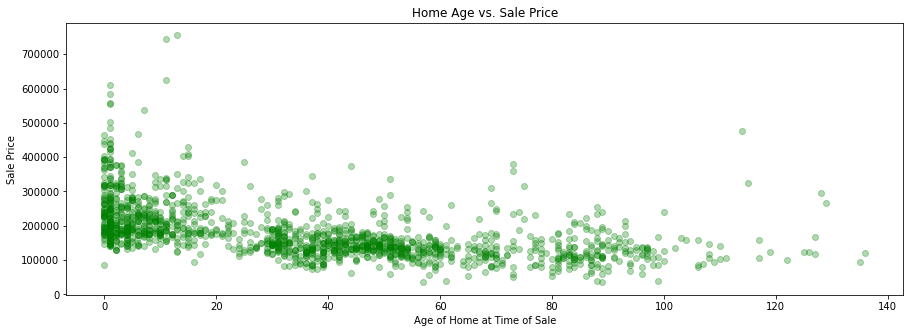

In [189]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [ ]:
# Replace None with appropriate text
"""
The plot above shows generally that newer houses tend to sell for higher
prices as evident by the large spikes towards the left of the graph.
Interestingly you can see that there are some outliers as a few older
homes did fetch relatively high sales prices.

There is also a visually drop of the bottom sales price at around 35
years of ahe which causes me to think that something within the construction
of the homes may have changed around that time, effecting their 
values across all homes.


"""

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset! You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.